In [1]:
# make local files accessible to import statements
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../..'))

In [2]:
from examples.Arabas_and_Shima_2017_Fig_5.example import Simulation, setups
import numpy as np
import matplotlib.pyplot as plt

In [3]:
for setup in setups:
    simulation = Simulation(setup)
    output = simulation.run()
    print(min(output["z"]), max(output["z"]))
    break


t_half: 150.0 dt: 0.3 n_steps: 1000 w_avg: 1.0
3.1922233953429746e-12 75.00012337019754


In [10]:
print(setups[0].w(37.8))

1.1176776281438645


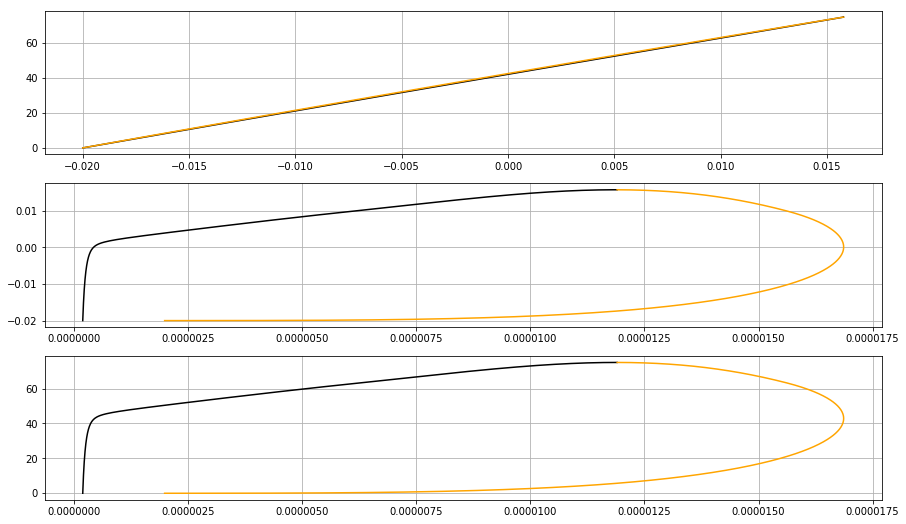

In [4]:
figsize = (15,9)
fig, axs = plt.subplots(3, 1, figsize=figsize) #, sharey=True, sharex=True)

split = lambda arg1, arg2: (arg1[0:np.argmax(arg2) + 1], arg1[np.argmax(arg2):-1])

z1, z2 = split(output["z"], output["z"])
S1, S2 = split(output["S"], output["z"])
r1, r2 = split(output["r"], output["z"])

axs[0].plot(S1, z1, label='', color='k')
axs[0].plot(S2, z2, color='orange')
axs[0].grid()

axs[1].plot(r1, S1, label='', color='k')
axs[1].plot(r2, S2, color='orange')
axs[1].grid()

axs[2].plot(r1, z1, label='', color='k')
axs[2].plot(r2, z2, color='orange')
axs[2].grid()


#axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15))
#axs[i].xaxis.set_units(si.percent)
#axs[i].yaxis.set_units(si.metre)
#axs[i].set_xlim([-1, 1])